
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

## Hope Knopf, UTEID: hk23735

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer




    I think that solving the wrong problem in data science is one the most pervasive issues in the technology industry. Because data scientists are generally inquisitive, curious people driven by challenge, they can often dive into data exploration without first asking what is the purpose of this exploration and what problem do we need to solve.  This leads to enormous waste of time, money and resources from the perspective of the company and a general misurstanding of the efficacy of data science.  One can imagine many examples of this occuring with an over-zealous team of data scientists. For instance, say an insurance company wants to learn what customers are leaving their services, what attributes those customers possess, and why they are leaving.  They employ a team of data scientists to provide insights on this problem based on the vast amount of data they have on their customers and their transactions with the insurance company. The data scientists dive into the cleaning and analysis of this large amount of data.  They may end up finding all kinds of different patterns and insights in the data, that they explore with gusto.  They end up finding out a lot about the patterns of the customers with the highest insurance plans and the risk accounted for those customers.  They do not, however, find any intelligence about why customers churn and go to a different insurance company.  While they have found interesting information from the data, they have not solved the problem they are being paid to solve.  

# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer

Let's say that there are n data points. X is the feature vector, **w** is the weight vector. If the modeling assumptions are correct, the joint distribution of Y given X is given by the below equation

\begin{align*}
P(Y|X) = \frac{1}{\sqrt{2 \pi}\sigma} \exp^{\sum_{i = 1}^n -(y_i -  w^T x_i)^2/\sigma^2}
\end{align*}

MLE  selects the predictor coeffiecients **w** in such a way that it maximizes the probability of encountering the observed dataset. Its clear that this probability is maximized if we maximize the exponential term, which is maximized if the maximize the coefficient of the exponent term. Thus we need to maximize the below term : 

\begin{align*}
max : \sum_{i = 1}^n -(y_i -  w^T x_i)^2/\sigma^2
\end{align*}

which is same as minimizing 

\begin{align*}
min : \sum_{i = 1}^n (y_i -  w^T x_i)^2/\sigma^2
\end{align*}

This final equation (which represents the negative log-likelihood) is proportional to the mean square error which we minimise in OLS.

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer

Collinearity is when two or more predictors in an MLR model are moderately or highly correlated.  Collinearity increases the variance and standard error of the regression coefficients, rendering them unstable.  The higher the variance, the harder it is to interpret the coefficients.  You can detect collinearity using variance inflation factors and remove the highly correlated predictors to address this problem. If removing predictor variables is not a viable option, you could also use principal component analysis to choose variables that reduce collinearity. 

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

## Answer

### a.

In [3]:
X.shape

(188318, 14)

In [4]:
X[0:5]

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


### b.

In [5]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import linear_model
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [6]:
y, X = dmatrices('loss ~ cont1 + cont2 + cont3 + cont4 + cont5 + cont6 + cont7 + cont8 + cont9 + cont10 + cont11 + cont12 + cont13 + cont14', data=train_df, return_type='dataframe')

In [7]:
#fit model 
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [8]:
X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']
result = lm.fit(X,Y)

In [9]:
#report regression coefficients of each input feature 
print('The regression coefficents are shown below')
pd.DataFrame(result.coef_)

The regression coefficents are shown below


,0
0,-2137.111212
1,1762.240616
2,-56.579685
3,-301.172981
4,30.032018
5,-557.225099
6,1707.955206
7,298.612406
8,2049.379104
9,-250.019861


In [10]:
#report MAE
from sklearn.metrics import mean_absolute_error
y_pred = lm.predict(X)
print('The mean absolute error is ', mean_absolute_error(Y, y_pred))

The mean absolute error is  1950.3606265639835


### c.

In [11]:
from sklearn.model_selection import train_test_split

#split into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

In [12]:
#fit the MLR on training set 
y, X = dmatrices('loss ~ cont1 + cont2 + cont3 + cont4 + cont5 + cont6 + cont7 + cont8 + cont9 + cont10 + cont11 + cont12 + cont13 + cont14', data=train_df, return_type='dataframe')
lm = linear_model.LinearRegression()
result = lm.fit(X_train, Y_train)       # Fit model

In [13]:
#MAE for training set 
Y_train_pred = lm.predict(X_train)
print('The mean absolute error is ', mean_absolute_error(Y_train, Y_train_pred))

The mean absolute error is  1946.9866773014621


In [14]:
#fit MLR on test set 
result = lm.fit(X_test, Y_test)       # Fit model (find the intercept and slopes)
prediction = lm.predict(X_test)

In [15]:
#MAE for test set 
Y_test_pred = lm.predict(X_test)
print('The mean absolute error is ', mean_absolute_error(Y_test, Y_test_pred))

The mean absolute error is  1958.1821098717114


We got a higher mean absolute error out of sample than in sample.  Both are higher than the MAE of 1950 found in part (b). 

### d.

(array([3.3224e+04, 4.0947e+04, 2.1819e+04, 1.3022e+04, 7.9650e+03,
        5.1370e+03, 3.0700e+03, 2.1010e+03, 1.3880e+03, 9.4900e+02,
        6.2600e+02, 4.3800e+02, 3.1000e+02, 2.2600e+02, 1.4300e+02,
        1.1300e+02, 7.7000e+01, 6.3000e+01, 4.3000e+01, 3.3000e+01,
        2.8000e+01, 2.4000e+01, 1.3000e+01, 1.0000e+01, 1.0000e+01,
        5.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

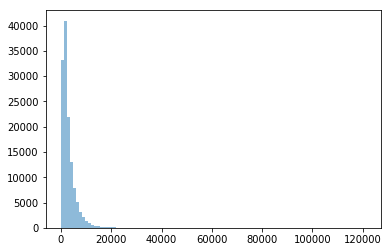

In [16]:
#plot histogram of Y_train to see distribution 
import matplotlib.pyplot as plt
plt.hist(Y_train, bins=100, alpha=0.5)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 5.0000e+00, 2.2000e+01, 6.4000e+01, 3.1800e+02,
        2.9880e+03, 1.8247e+04, 3.2835e+04, 3.5248e+04, 2.6281e+04,
        1.2542e+04, 2.9410e+03, 3.0100e+02, 2.0000e+01, 5.0000e+00]),
 array([-0.40047757,  0.20472866,  0.8099349 ,  1.41514113,  2.02034736,
         2.62555359,  3.23075982,  3.83596605,  4.44117228,  5.04637851,
         5.65158475,  6.25679098,  6.86199721,  7.46720344,  8.07240967,
         8.6776159 ,  9.28282213,  9.88802837, 10.4932346 , 11.09844083,
        11.70364706]),
 <a list of 20 Patch objects>)

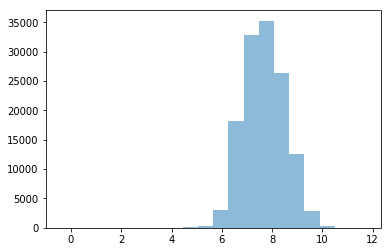

In [17]:
#take log of Y_train and plot histogram 
log_train_Y = np.log(Y_train)
plt.hist(log_train_Y, bins=20, alpha=0.5)

In [18]:
#run regression again on log Y_train and compare MAE
#do np.exp(predictions) and then calculate MAE
lm = linear_model.LinearRegression()
result = lm.fit(X_train, log_train_Y)  

Y_train_pred = np.exp(lm.predict(X_train))

print('The mean absolute error is ', mean_absolute_error(log_train_Y, Y_train_pred))

The mean absolute error is  2182.147088859115


The mean absolute error increases when we take the log of our training set.

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

## Answer



In [19]:
X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']
#split data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)
#take log of Y_train to use for training
log_train_Y = np.log(Y_train)

In [24]:
log_train_Y #check 

103945    6.450376
125348    8.045950
74359     7.395427
136243    6.856883
154604    7.273967
66035     7.338043
71117     8.642112
133398    9.158423
34248     7.522352
39550     7.752099
55445     7.475300
125043    9.358644
27840     8.113843
35000     8.290717
116248    9.192974
103599    7.668603
54699     8.105501
110037    7.762081
58319     7.443318
530       8.540529
121218    7.300182
78837     9.875959
29527     7.335816
180946    7.979168
146223    9.518331
93428     7.050833
87419     5.896302
9544      7.206511
31904     9.463308
12916     7.782357
            ...   
105577    6.655530
184734    6.107312
176207    6.307114
151170    7.444915
44179     8.645917
53766     7.108719
49659     8.419272
70654     7.626054
43328     6.894042
130154    7.108710
88405     6.762753
36244     8.914002
23686     8.214533
86234     6.827456
82523     7.919193
98140     8.093978
150478    7.445511
50628     7.408591
8559      8.649852
165959    6.315738
122106    8.104293
186463    7.

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

### 1) 

In [21]:
#lambda values 
import numpy as np
alphas =  10**np.linspace(10,-6,100)*0.5

Best alpha:  {'alpha': 6.309284415330092e-05}
Best score:  -0.6548869493016525


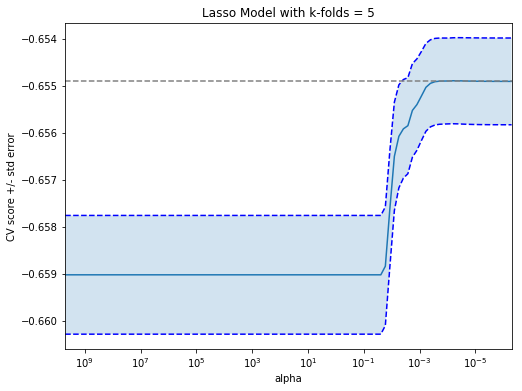

In [22]:
import warnings
warnings.filterwarnings('ignore')

lasso = Lasso(random_state=50)

#K fold CV Lasso
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring = 'mean_absolute_error')
clf.fit(X_train, log_train_Y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')


plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Lasso Model with k-folds = 5')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

print ("Best alpha: ", clf.best_params_)
print ("Best score: ", clf.best_score_)

Best alpha:  {'alpha': 13.5929412136647}
Best score:  -0.654890499493081


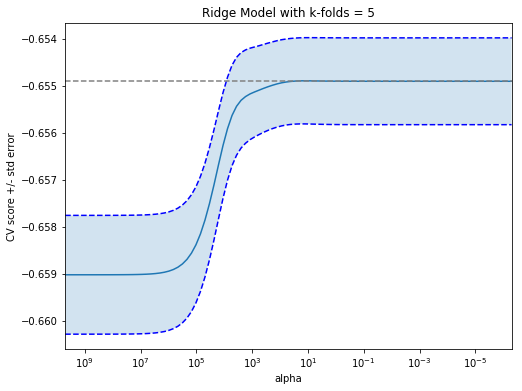

In [23]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

#K Fold CV Ridge
ridge = Ridge(random_state=50)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

crf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False , scoring = 'mean_absolute_error')
crf.fit(X_train, log_train_Y)
scores = crf.cv_results_['mean_test_score']
scores_std = crf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Ridge Model with k-folds = 5')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

print ("Best alpha: ", crf.best_params_)
print ("Best score: ", crf.best_score_)

### 2)

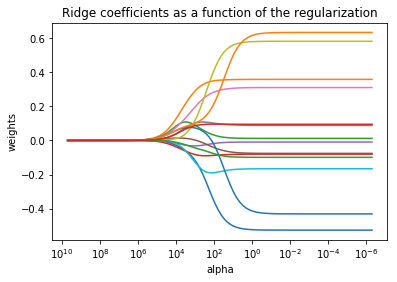

In [24]:
#run ridge 
from sklearn import linear_model
ridge = linear_model.Ridge

alphas =  10**np.linspace(10,-6,100)*0.5
n_alphas = 100

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, log_train_Y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


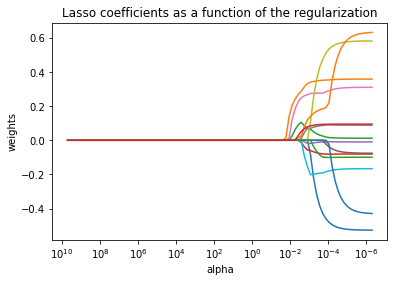

In [32]:
#run lasso 
lasso = linear_model.Lasso

n_alphas = 100

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, log_train_Y)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


In lasso, the regression coefficients are approaching 0 more quickly than they are in ridge.  

### 3)

In [30]:
#Run least squares regression on the training data
lm = linear_model.LinearRegression()
result = lm.fit(X_train, log_train_Y)

#get MAE
y_pred = lm.predict(X_test)
print('The mean absolute error is ', mean_absolute_error(Y_test, y_pred))

The mean absolute error is  3041.746841438936


In [31]:
#run ridge on training data
best_alpha_ridge = crf.fit(X_train, Y_train).best_estimator_.alpha
ridge = Ridge(random_state = 50, alpha = best_alpha_ridge)
ridge_fit = ridge.fit(X_train, log_train_Y)

#get MAE
y_pred = ridge_fit.predict(X_test)
print('The mean absolute error is ', mean_absolute_error(Y_test, y_pred))

The mean absolute error is  3041.747451599329


In [34]:
#run lasso on training data
best_alpha_lasso = crf.fit(X_train, Y_train).best_estimator_.alpha
lasso = Lasso(random_state = 50, alpha = best_alpha_lasso)
lasso_fit = lasso.fit(X_train, log_train_Y)

#get MAE
y_pred = lasso_fit.predict(X_test)
print('The mean absolute error is ', mean_absolute_error(Y_test, y_pred))

The mean absolute error is  3041.747995926971


### 4)

In [35]:
#run lasso with CV
clf = LassoCV(alphas=None, cv=10, max_iter=10000)
clf.fit(X_train, Y_train)
best_alpha = clf.alpha_

#Report the best  lambda 
print ("The best lambda value is ", best_alpha)


#Run lasso on the training data using best lambda
lasso2 = Lasso(random_state = 50, alpha = best_alpha)
lasso2_fit = lasso2.fit(X_train, Y_train)

#report the coefficeints for all variables
print ("The list of coefficients is as follows: \n", lasso2_fit.coef_)
lasso2_y_pred = lasso2_fit.predict(X_test)

The best lambda value is  0.0847344666002162
The list of coefficients is as follows: 
 [-2061.95754937  1740.42119228   -44.33076231  -307.64677239
    49.49017238  -681.32900774  1777.30464782   323.05009389
  2014.13043053  -232.29326175 -1454.3955373   2399.16261087
  -538.56666372   245.03939471]


# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer

\begin{equation}
\textbf{w}^{*} = \min_{w}{\frac{1}{2}\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}^2}
\end{equation}

Take the derivative and set equal to 0:
\begin{align*}
\frac{\partial \textrm{E}_\textrm{D}(\textbf{w})}{\partial \textbf{w}} &= \
\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}(-\phi(x_n)) \\
&= -\sum_{n = 1}^Nr_n\{t_n - \textbf{w}^\textrm{T}\phi(x_n)\}\phi(x_n) \\
&= -\sum_{n = 1}^Nr_nt_n\phi(x_n) + \sum_{n = 1}^Nr_n\textbf{w}^\textrm{T}\phi(x_n)\phi(x_n)^{\textrm{T}} = 0
\end{align*}

Solving for $\textbf{w}$:
\begin{equation}
\textbf{w}^{*} = \bigg(\sum_{n = 1}^Nr_n\textbf{w}^\textrm{T}\phi(x_n)\phi(x_n)^{\textrm{T}}\bigg)^{-1}\bigg(\sum_{n = 1}^Nr_nt_n\phi(x_n)\bigg)
\end{equation}


**An alternative approach, using vectorized notation:**


Let there be N data points. And M features per data point.

Let us denote the variable we are predicting with **T** which is Nx1 dimensional matrix.

The coefficient matrix is denoted by **w** which is MX1 in dimensions. 

Let us denote these weigths r by a diagonal matrix **R** which is of NxN dimension. For example for 3 data points it would look like

\begin{align*}
R = 
\begin{bmatrix}
r1&0&0\\
0&r2&0\\
0&0&r3\\
\end{bmatrix}
\end{align*}

So, we can write the sum of squares function as

\begin{align*}
min : (T - \phi w)^T R(T-\phi w)
\end{align*}

We can write these equations as :

\begin{align*}
min : T^T RT - T^T R\phi w - w^T \phi ^T RT + w^T \phi ^T R\phi w
\end{align*}

Differentiate it w.r.t **w** matrix, we get

\begin{align*}
-2\phi ^T RT + 2\phi ^T R\phi w = 0 \\
w = (\phi ^T R\phi)^{-1} \phi ^T RT
\end{align*}

Interpretation : 
(i) Our assumption is that the errors have constant variance. But if it not true, and error varies with each data point then we can use this scaling factor to make the variance constant. For example, we can set this scaling factor as 

\begin{align*}
r_i = \frac{1}{\sigma_i^2} 
\end{align*}

If we use this scaling factor, then the variance of each error will become 1, and thus all of them will have same variance.